# Laboratorio 2 - Data Science
## Series de Tiempo
### Integrantes:

* Mario Guerra - Carné: 21008
* Javier Alvarado - Carné: 21188

## Análisis Exploratorio

In [22]:
import pandas as pd

# Cargar los archivos .xlsx
consumo_df = pd.read_excel('CONSUMO-2024-05.xlsx')
importacion_df = pd.read_excel('IMPORTACION-VOLUMEN-2024-05.xlsx')
precios_df = pd.read_excel('Precios-Promedio-Nacionales-Diarios-2024-3.xlsx')

# Limpiar los datos eliminando filas completamente vacías y ajustando encabezados
def limpiar_datos(df):
    df_cleaned = df.dropna(how='all')
    df_cleaned.columns = df_cleaned.iloc[1]
    df_cleaned = df_cleaned[2:]
    df_cleaned = df_cleaned.dropna()
    df_cleaned.reset_index(drop=True, inplace=True)
    return df_cleaned

# Cargar todas las hojas de cálculo de precios promedio nacionales
precios_xls = pd.ExcelFile('Precios-Promedio-Nacionales-Diarios-2024-3.xlsx')
precios_sheets = []

for sheet_name in precios_xls.sheet_names:
    sheet_df = precios_xls.parse(sheet_name)
    sheet_df_cleaned = limpiar_datos(sheet_df)
    precios_sheets.append(sheet_df_cleaned)

# Combinar todas las hojas en un solo DataFrame
precios_df_combined = pd.concat(precios_sheets, ignore_index=True)

consumo_df_cleaned = limpiar_datos(consumo_df)
importacion_df_cleaned = limpiar_datos(importacion_df)

# Mostrar las primeras filas de cada dataframe limpio
print(consumo_df_cleaned.head())
print(importacion_df_cleaned.head())
print(precios_df_combined)

#print(consumo_df_cleaned.columns)
#print(importacion_df_cleaned.columns)
#print(precios_df_combined.columns)

5                Fecha Aceites lubricantes Asfalto     Bunker Ceras  \
0  2000-01-01 00:00:00                   0   48446  296766.99     0   
1  2000-02-01 00:00:00                   0   50597  328116.44     0   
2  2000-03-01 00:00:00                   0   27593  368589.63     0   
3  2000-04-01 00:00:00                   0   53794  396300.47     0   
4  2000-05-01 00:00:00                   0   60137  449368.92     0   

5 Combustible turbo jet Diesel bajo azufre Diesel ultra bajo azufre  \
0                     0                  0                        0   
1                     0                  0                        0   
2                     0                  0                        0   
3                     0                  0                        0   
4                     0                  0                        0   

5 Gas licuado de petróleo Gasolina de aviación  ...  Kerosina  \
0            194410.47619                 1426  ...  64026.09   
1           1747

In [23]:
# Seleccionar las columnas relevantes

# Consumo mensual
consumo_relevant_columns = ['Fecha', 'Gasolina superior', 'Gasolina regular', 'Diesel bajo azufre', 'Gas licuado de petróleo']
consumo_df_filtered = consumo_df_cleaned[consumo_relevant_columns]

# Importación mensual
importacion_relevant_columns = ['Fecha', 'Gasolina superior', 'Gasolina regular', 'Diesel bajo azufre', 'Gas licuado de petróleo']
importacion_df_filtered = importacion_df_cleaned[importacion_relevant_columns]

# Precios en ciudad capital
precios_relevant_columns = ['FECHA', 'Superior', 'Regular', 'Diesel', 'Glp Cilindro 25Lbs.']
precios_df_filtered = precios_df_combined[precios_relevant_columns]

# Mostrar un resumen de los datos filtrados
print(consumo_df_filtered.describe())
print(importacion_df_filtered.describe())
print(precios_df_filtered.describe())

5                     Fecha  Gasolina superior  Gasolina regular  \
count                   292             292.00             292.0   
unique                  292             292.00             292.0   
top     2000-01-01 00:00:00          308156.82          202645.2   
freq                      1               1.00               1.0   

5       Diesel bajo azufre  Gas licuado de petróleo  
count                  292                292.00000  
unique                  77                292.00000  
top                      0             194410.47619  
freq                   216                  1.00000  
5                     Fecha  Gasolina superior  Gasolina regular  \
count                   280             280.00             280.0   
unique                  280             280.00             280.0   
top     2001-01-01 00:00:00          373963.96          177776.5   
freq                      1               1.00               1.0   

5       Diesel bajo azufre  Gas licuado de petró

C:\Users\mague\AppData\Local\Temp\ipykernel_30772\1766573668.py:16: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print(consumo_df_filtered.describe())
C:\Users\mague\AppData\Local\Temp\ipykernel_30772\1766573668.py:17: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print(importacion_df_filtered.describe())
C:\Users\mague\AppData\Local\Temp\ipykernel_30772\1766573668.py:18: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_obj

C:\Users\mague\AppData\Local\Temp\ipykernel_30772\2569864681.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumo_df_filtered['Fecha'] = pd.to_datetime(consumo_df_filtered['Fecha'])
C:\Users\mague\AppData\Local\Temp\ipykernel_30772\2569864681.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importacion_df_filtered['Fecha'] = pd.to_datetime(importacion_df_filtered['Fecha'])


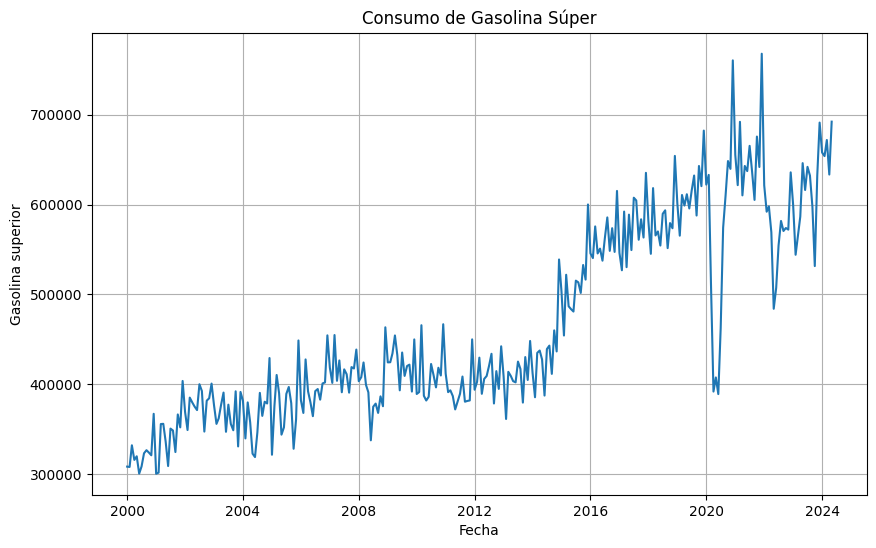

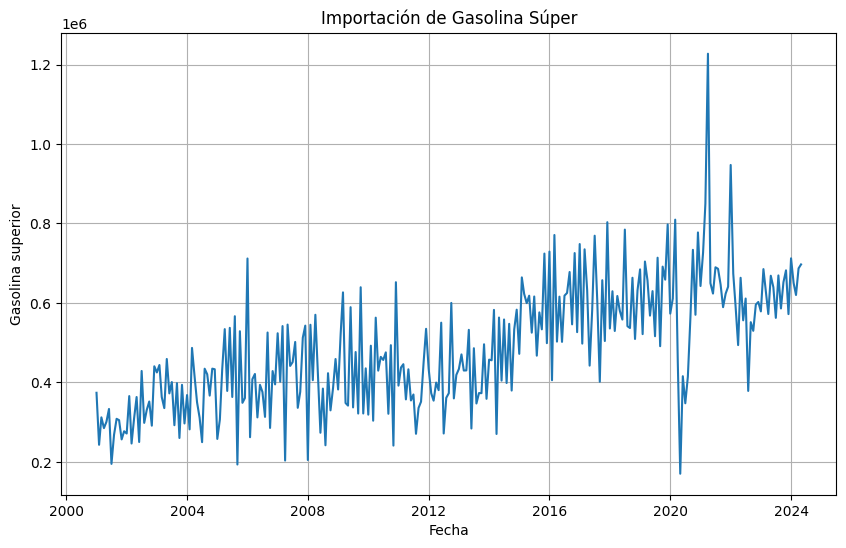

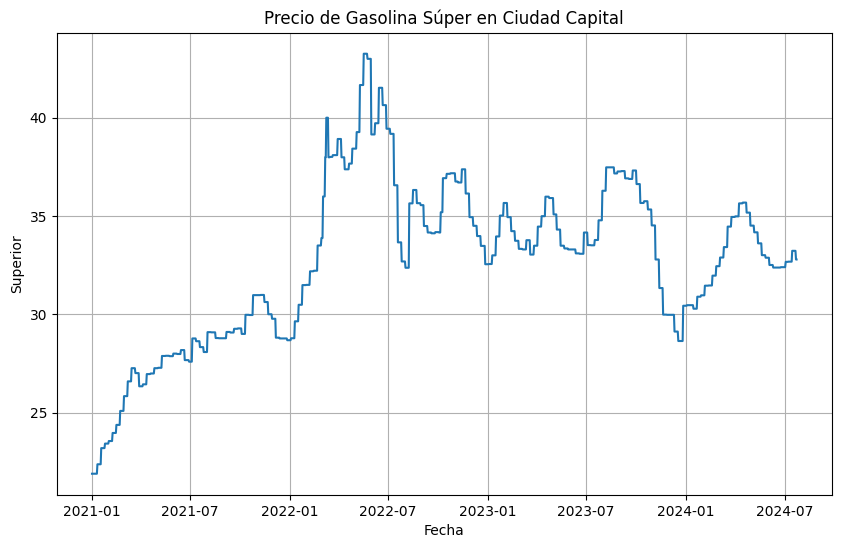

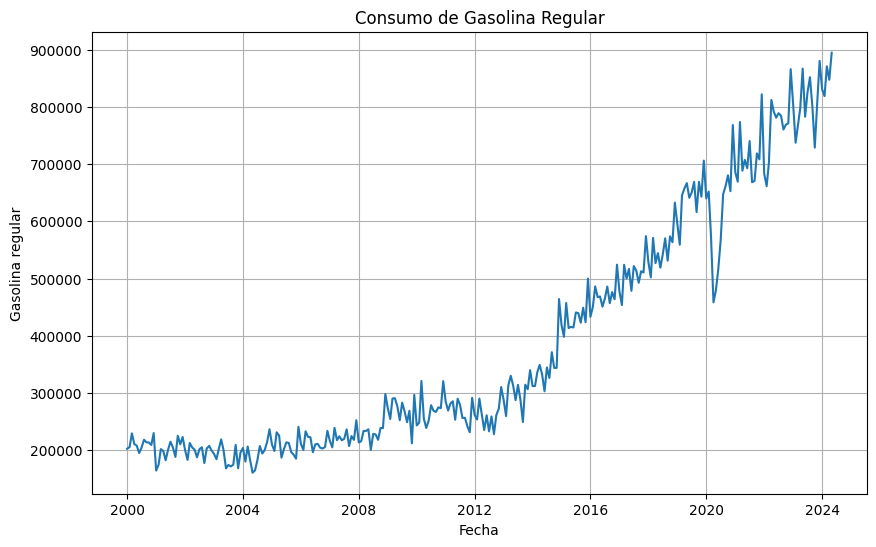

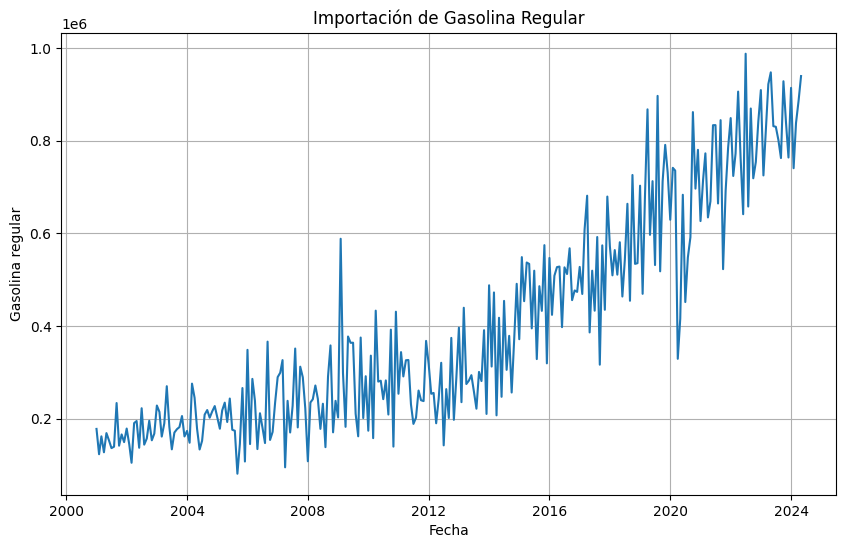

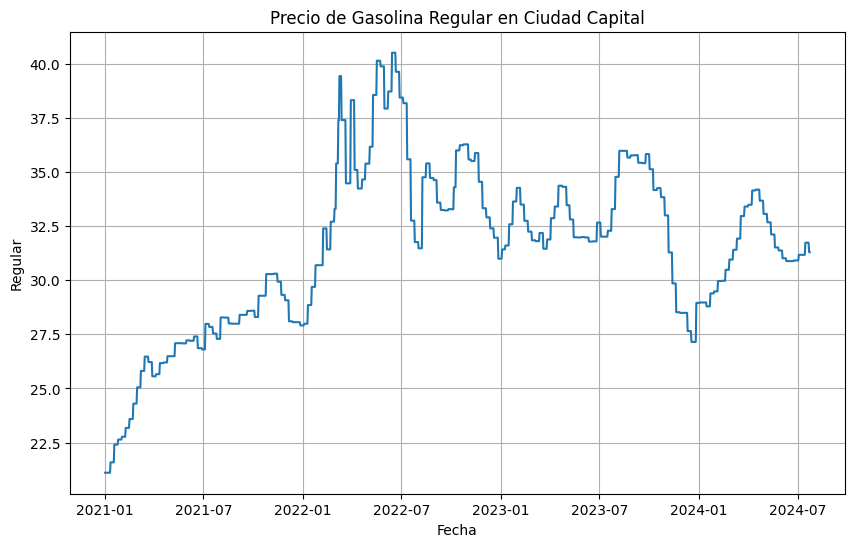

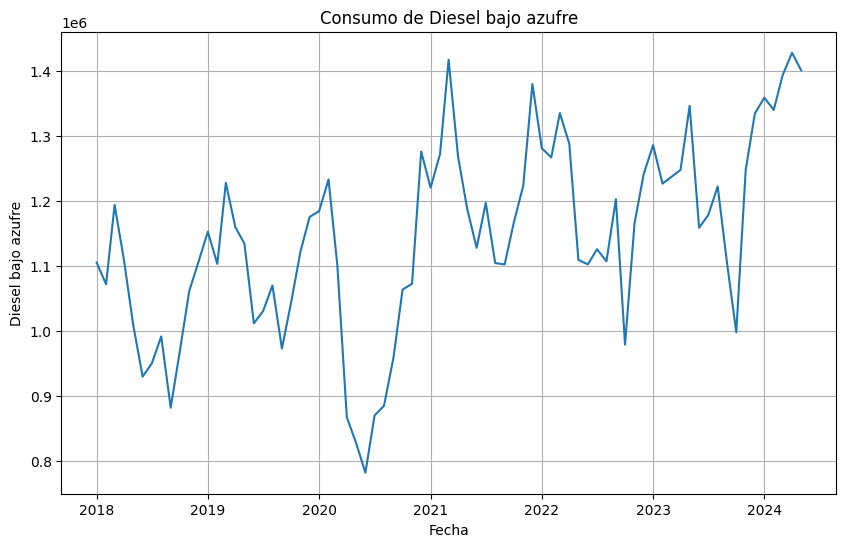

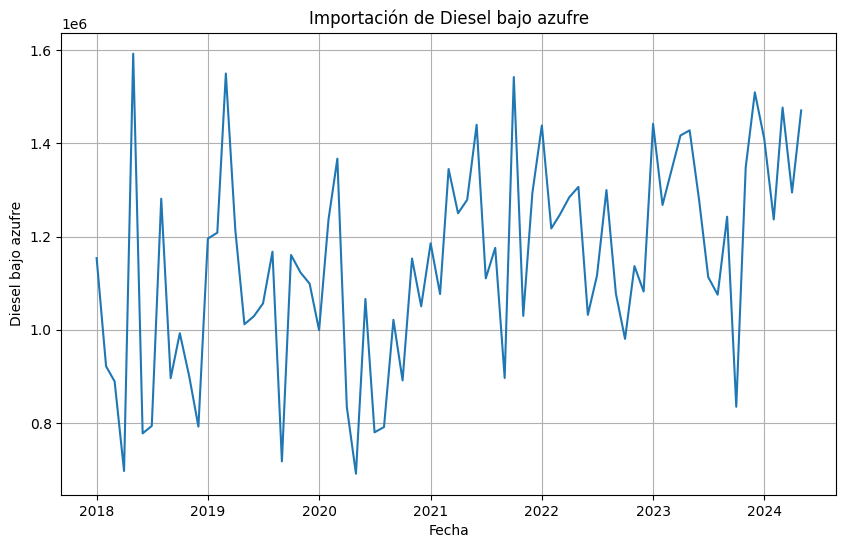

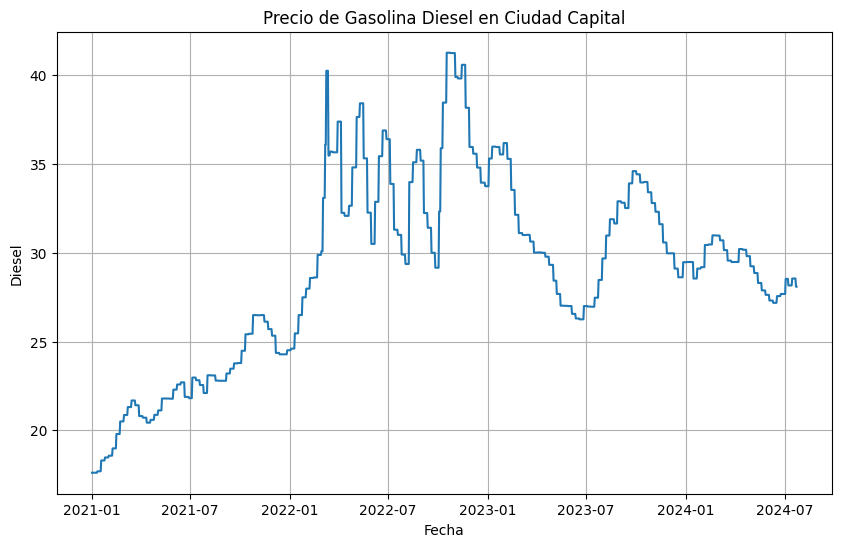

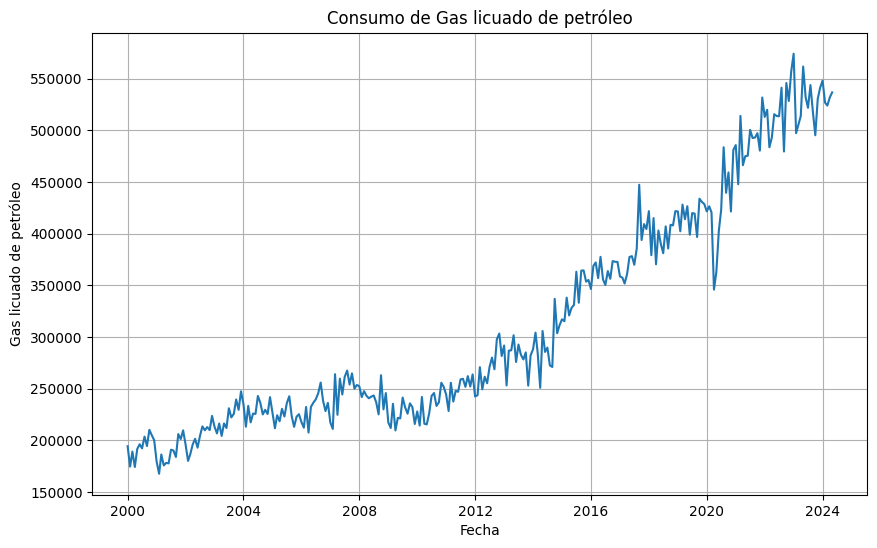

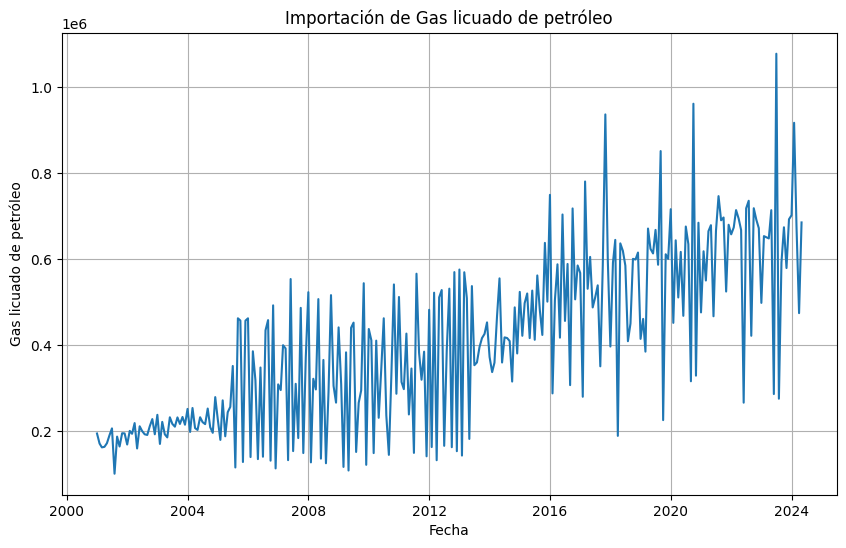

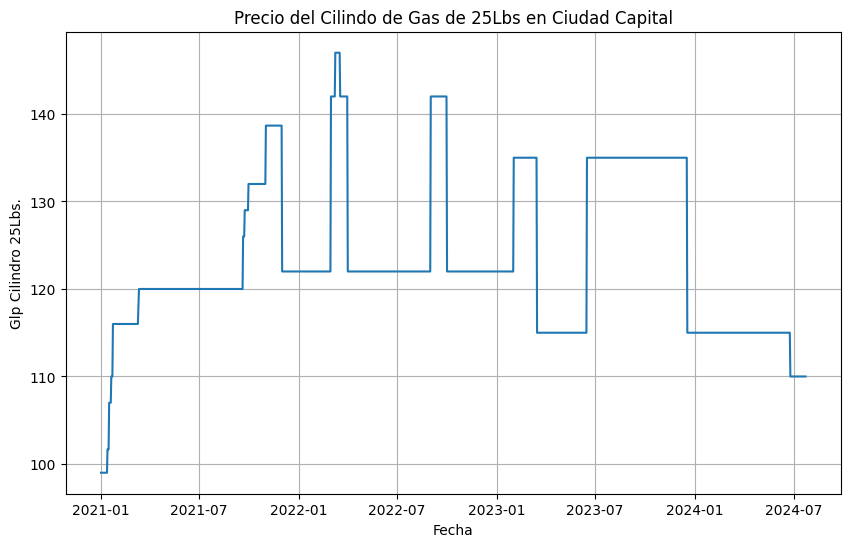

In [26]:
import matplotlib.pyplot as plt

# Convertir la columna de fecha a formato de fecha
consumo_df_filtered['Fecha'] = pd.to_datetime(consumo_df_filtered['Fecha'])
importacion_df_filtered['Fecha'] = pd.to_datetime(importacion_df_filtered['Fecha'])
precios_df_filtered['FECHA'] = pd.to_datetime(precios_df_filtered['FECHA'])

# Ordenar el DataFrame por fecha de forma ascendente
precios_df_filtered = precios_df_filtered.sort_values(by='FECHA').reset_index(drop=True)

# Graficar las series de tiempo
def plot_series(df, date_col, value_col, title):
    plt.figure(figsize=(10, 6))
    plt.plot(df[date_col], df[value_col])
    plt.title(title)
    plt.xlabel('Fecha')
    plt.ylabel(value_col)
    plt.grid(True)
    plt.show()

start_date = '2018-01-01'

consumo_df_filtered_diesel = consumo_df_filtered[consumo_df_filtered['Fecha'] >= start_date]
importacion_df_filtered_diesel = importacion_df_filtered[importacion_df_filtered['Fecha'] >= start_date]

# Comportamiento de las variables de gasolina súper.
plot_series(consumo_df_filtered, 'Fecha', 'Gasolina superior', 'Consumo de Gasolina Súper')
plot_series(importacion_df_filtered, 'Fecha', 'Gasolina superior', 'Importación de Gasolina Súper')
plot_series(precios_df_filtered, 'FECHA', 'Superior', 'Precio de Gasolina Súper en Ciudad Capital')

# Comportamiento de las variables de gasolina regular.
plot_series(consumo_df_filtered, 'Fecha', 'Gasolina regular', 'Consumo de Gasolina Regular')
plot_series(importacion_df_filtered, 'Fecha', 'Gasolina regular', 'Importación de Gasolina Regular')
plot_series(precios_df_filtered, 'FECHA', 'Regular', 'Precio de Gasolina Regular en Ciudad Capital')

# Comportamiento de las variables de Diesel.
plot_series(consumo_df_filtered_diesel, 'Fecha', 'Diesel bajo azufre', 'Consumo de Diesel bajo azufre')
plot_series(importacion_df_filtered_diesel, 'Fecha', 'Diesel bajo azufre', 'Importación de Diesel bajo azufre')
plot_series(precios_df_filtered, 'FECHA', 'Diesel', 'Precio de Gasolina Diesel en Ciudad Capital')

# Comportamiento de las variables de gas licuado de petróleo.
plot_series(consumo_df_filtered, 'Fecha', 'Gas licuado de petróleo', 'Consumo de Gas licuado de petróleo')
plot_series(importacion_df_filtered, 'Fecha', 'Gas licuado de petróleo', 'Importación de Gas licuado de petróleo')
plot_series(precios_df_filtered, 'FECHA', 'Glp Cilindro 25Lbs.', 'Precio del Cilindo de Gas de 25Lbs en Ciudad Capital')

## Series de tiempo a trabajar

In [ ]:
### Código

## Análisis de cada serie de tiempo

In [ ]:
### Código